In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data_hope_final.csv')
data = data.iloc[:, 1:]

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mcc = data['mcc']
tavg = data['tavg']

In [7]:
noise = np.random.normal(0, 2, size=len(data))
tavg_jitter = tavg + noise

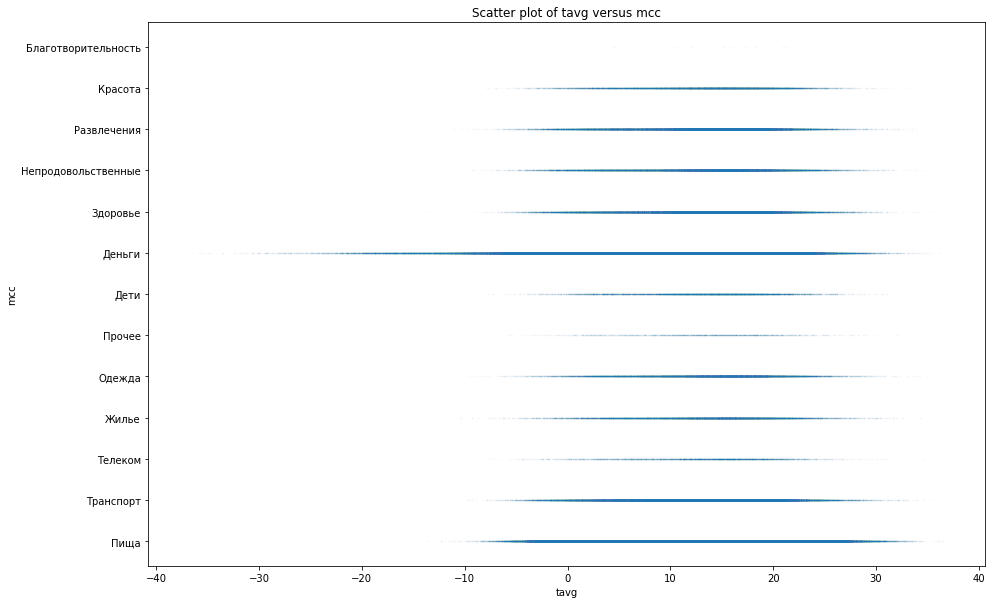

In [17]:
plt.figure(figsize=(15, 10))
plt.plot(tavg_jitter, mcc, 'o',
         alpha=0.02, markersize=1)


plt.xlabel('tavg')
plt.ylabel('mcc')
plt.title('Scatter plot of tavg versus mcc');

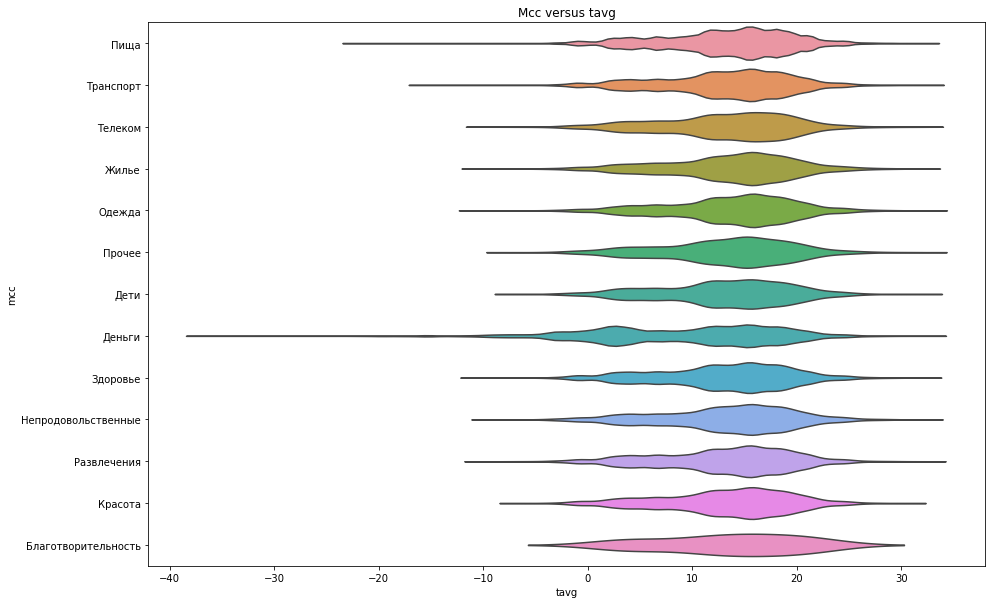

In [18]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.violinplot(x='tavg', y='mcc', data=data, inner=None)

plt.xlabel('tavg')
plt.ylabel('mcc')
plt.title('Mcc versus tavg');

In [33]:
data['region'] = data.region.apply(lambda x: x.split('_')[0])

In [34]:
data.drop(['transaction_date'], axis = 1, inplace = True)

In [35]:
min_ = data.wage.min()
max_ = data.wage.max()

In [36]:
data['wage'] = data.wage.apply(lambda x: (x-min_)/(max_ - min_))

/Users/viktoruymanov/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


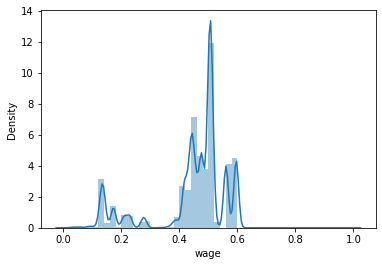

In [37]:
import seaborn as sns
sns.distplot(data.wage)

In [38]:
plot_columns = ['month', 'mcc', 'tavg','tmin','tmax', 'currency_rate', 'amount', 'clustering', 'wage']

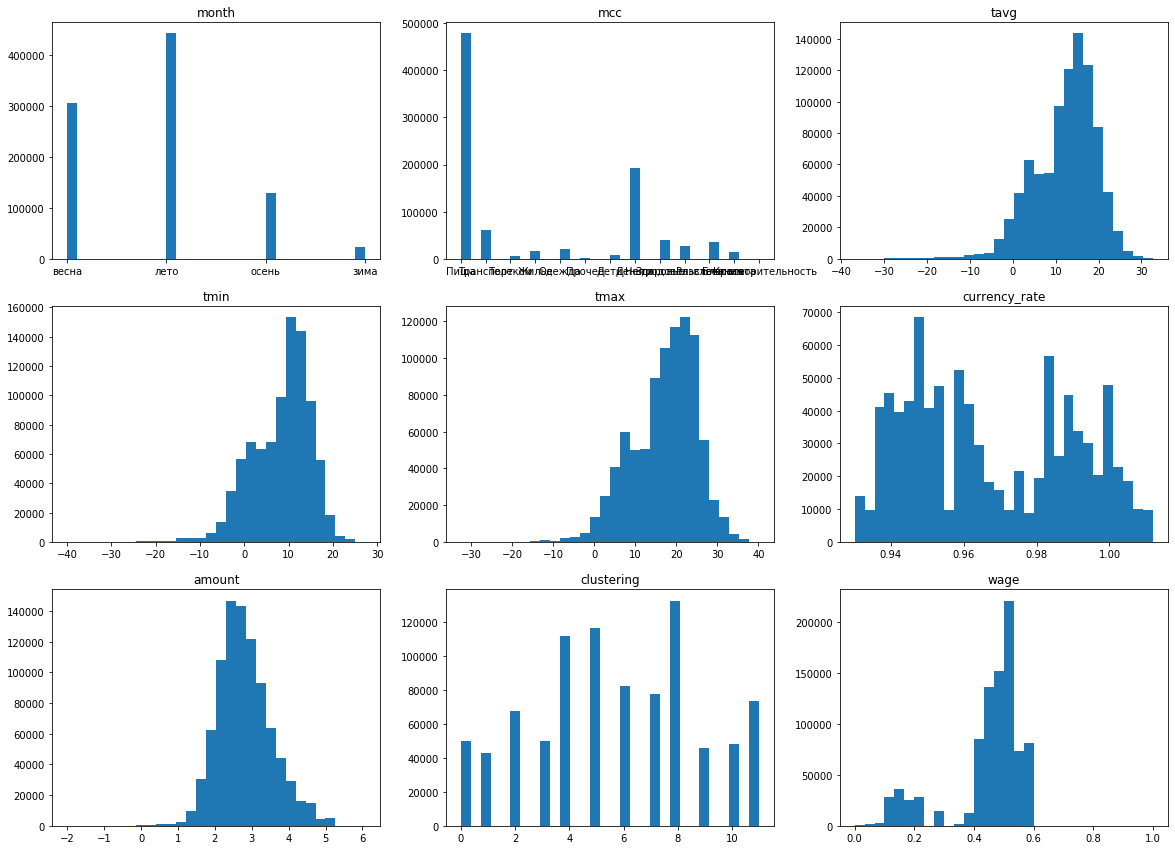

In [39]:
import matplotlib.pyplot as plt
ncols = 3
nrows = len(plot_columns)//ncols + 1
plt.figure(figsize = (20, 20))
for i, feature in enumerate(plot_columns):
        
    plt.subplot(nrows, ncols, i+1)
    plt.hist(data[feature], bins = 30)
    plt.title(feature)
    

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[['tavg','tmin','tmax']])
data[['tavg','tmin','tmax']] = scaled

In [41]:
data.city.value_counts().nlargest(10).sum()

753309

In [42]:
data_ = pd.get_dummies(data, columns=['mcc'])

In [43]:
mcc_columns = [column for column in data_.columns if column.startswith('mcc')]

In [44]:
import seaborn as sns


In [83]:
data_[mcc_columns] = data_[mcc_columns].multiply(data_['amount'], axis = 'index')

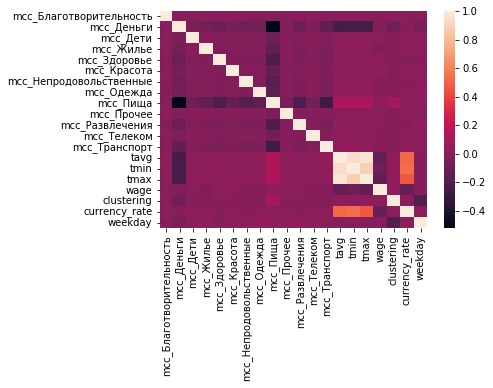

In [86]:
sns.heatmap(data_[mcc_columns + ['tavg','tmin', 'tmax', 'wage', 'clustering', 'currency_rate', 'month', 'weekday']].corr())

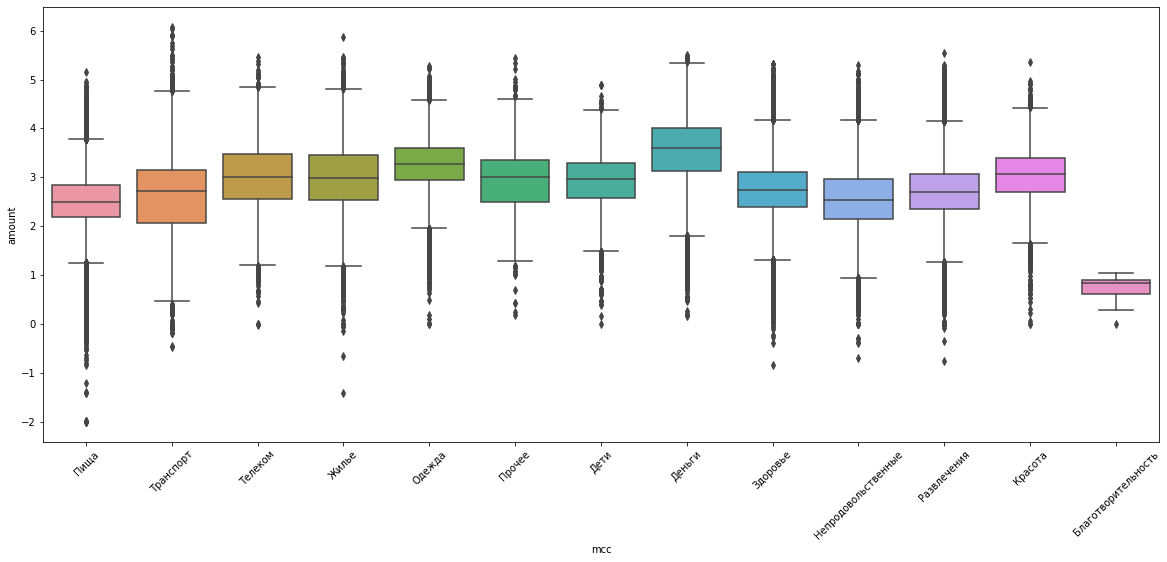

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.boxplot(x="mcc", y="amount", data=data)
plt.xticks(rotation = 45)
plt.show()

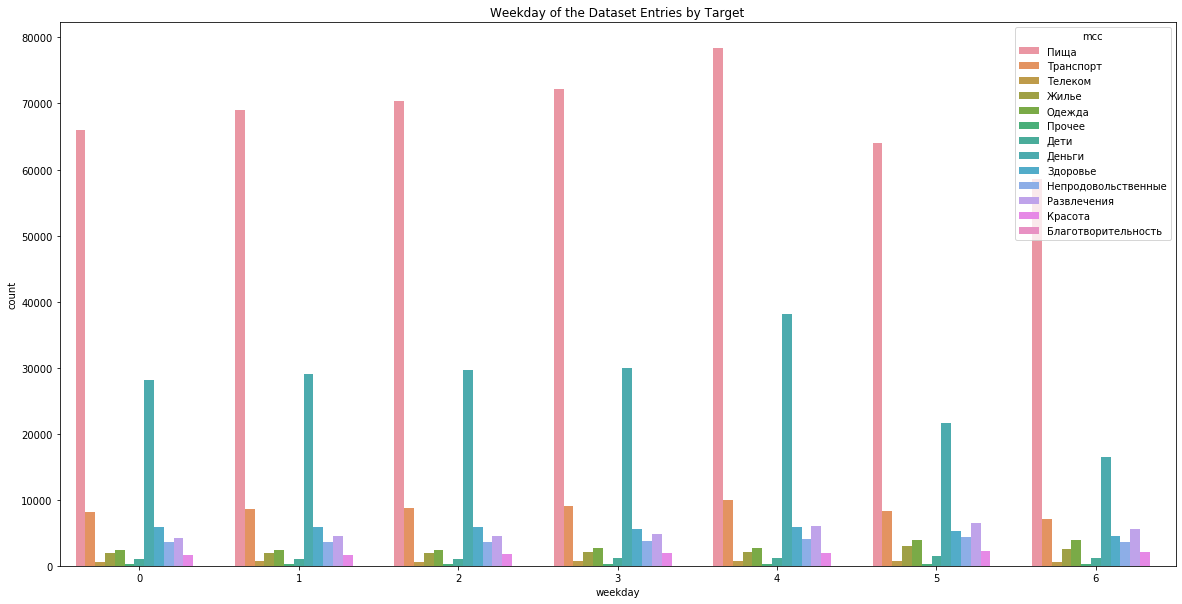

In [58]:
plt.figure(figsize = (20,10))
sns.countplot(data=data, x='weekday', hue='mcc')
plt.title("Weekday of the Dataset Entries by Target")
plt.show()

In [59]:
data_1 = pd.read_csv('dummies_data_1.csv')

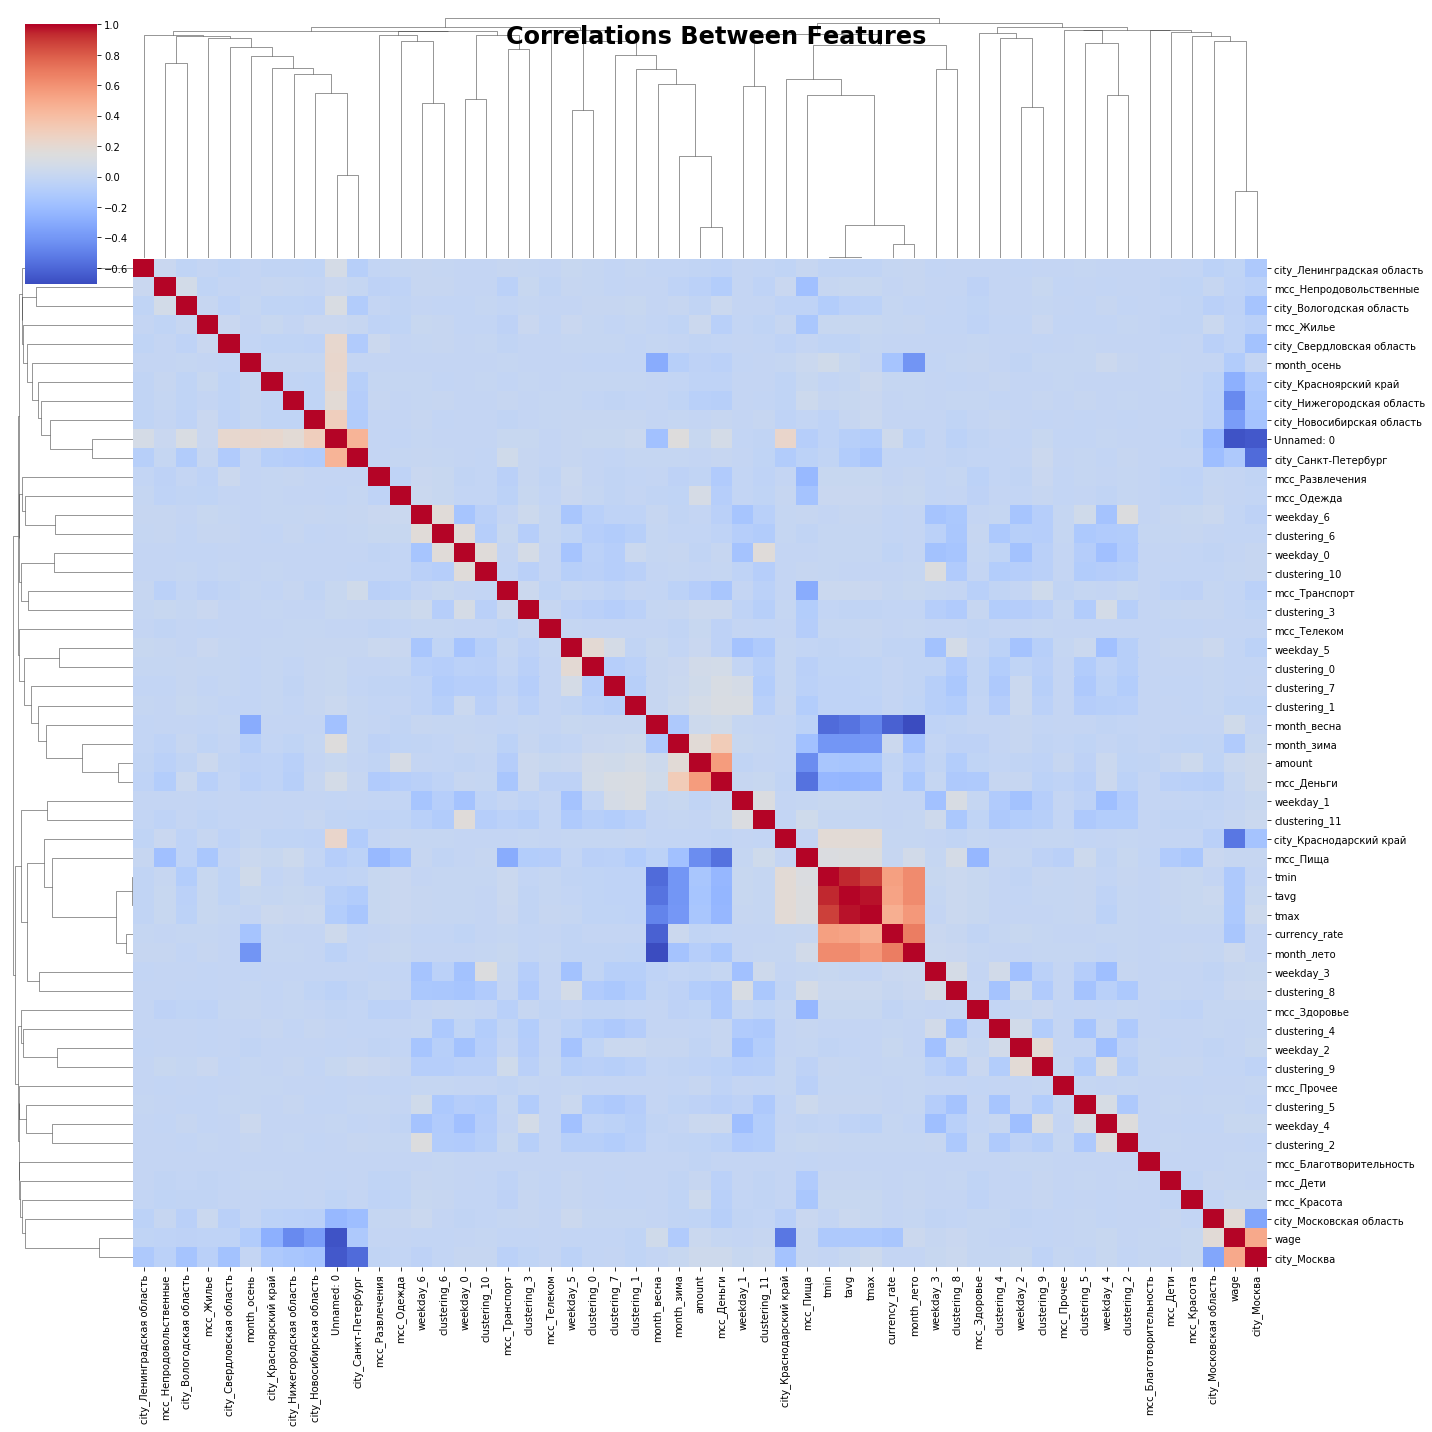

In [60]:
corr = data_1.corr()
sns.clustermap(corr, metric="correlation", figsize=(20, 20), dendrogram_ratio=(.1, .2), cmap="coolwarm")
plt.suptitle('Correlations Between Features', fontsize=24, weight='bold')
plt.show()

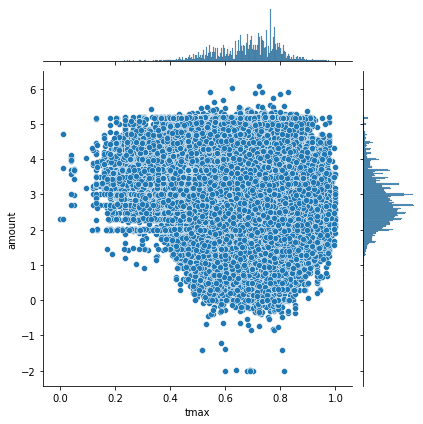

In [65]:
sns.jointplot(data=data, x="tmax", y="amount")